## Postprocessing - Equalized odds postprocessing - Adult Model
- for 'sex' and 'race'

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.insert(0, project_root)

import pandas as pd
from src.data_loading import load_adult_sex, load_adult_race
from src.modeling import get_default_model_pipeline, eq_odds_postprocessing_train_and_predict
from src.metrics import compute_metrics, compare_viz_metrics_2x3, best_hyperparameter_advdeb
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from aif360.datasets import BinaryLabelDataset
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold


/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

In [2]:
baseline_race_agg = pd.read_csv('../../reports/baseline_agg/adult_race_metrics_agg.csv', index_col=0)
baseline_sex_agg = pd.read_csv('../../reports/baseline_agg/adult_sex_metrics_agg.csv', index_col=0)

--------------------------------------------------------------------------------------------------------------------------------------

## default prejudice remover, sex

In [3]:
# 1) Load data
protected          = 'sex'
privileged_value   = 1.0
unprivileged_value = 0.0

ds, df = load_adult_sex()  
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run experiment and evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_test, y_pred = eq_odds_postprocessing_train_and_predict(
        df,
        train_idx,
        test_idx,
        protected,
        privileged_value,
        unprivileged_value,
        seed=42        
    )
        
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate results
adult_sex_metrics     = pd.DataFrame(results)
adult_sex_metrics_agg = adult_sex_metrics.agg(['mean', 'std'])
print(adult_sex_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.825509  0.601796 -0.090159  0.606463 -0.005484 -0.003431
std   0.003378  0.009946  0.007110  0.023323  0.025776  0.012903


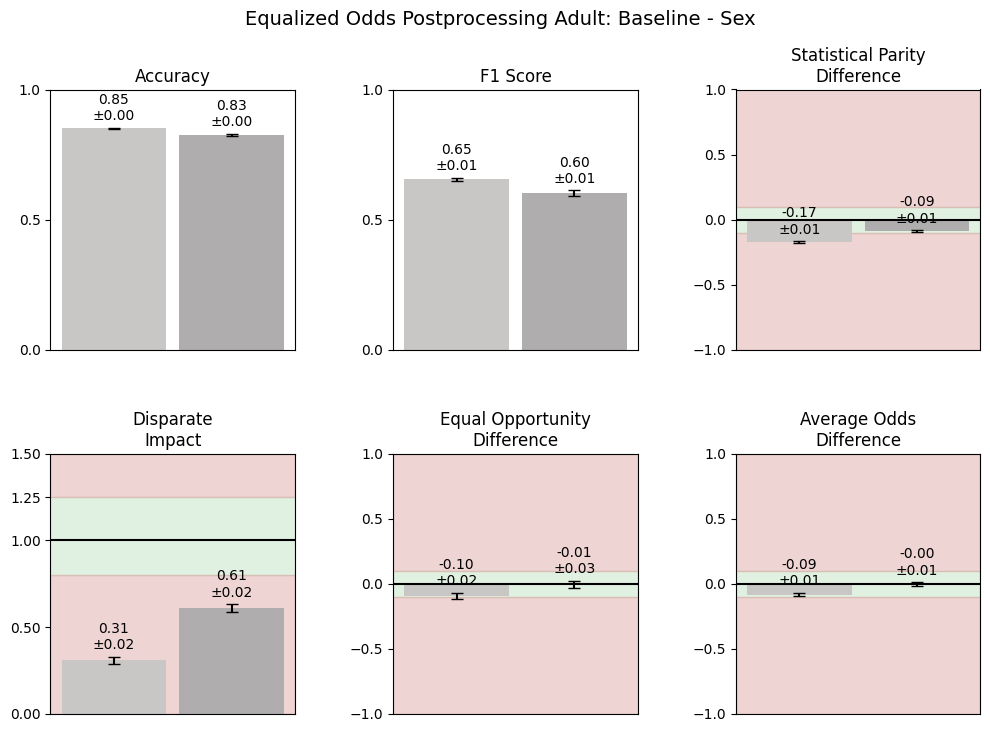

In [4]:
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Sex', 'Equalized Odds Postprocessing Adult: Baseline - Sex')

## default prejudice remover, race

In [5]:
# 1) Load data
protected          = 'race'
privileged_value   = 1.0
unprivileged_value = 0.0

ds, df = load_adult_race()  
feature_cols = [c for c in df.columns if c not in ('label', protected)]

# 2) Run experiment and evaluate
sss = StratifiedShuffleSplit(n_splits=25, test_size=0.2, random_state=42)

results = []
for train_idx, test_idx in sss.split(df, df['label']):
    test_df, y_test, y_pred = eq_odds_postprocessing_train_and_predict(
        df,
        train_idx,
        test_idx,
        protected,
        privileged_value,
        unprivileged_value,
        seed=42        
    )
    m = compute_metrics(
        test_df, y_test, y_pred,
        protected, privileged_value, unprivileged_value
    )
    results.append(m)

# 3) Aggregate results
adult_race_metrics     = pd.DataFrame(results)
adult_race_metrics_agg = adult_race_metrics.agg(['mean', 'std'])
print(adult_race_metrics_agg)

      accuracy  f1_score       SPD        DI       EOD       AOD
mean  0.843484  0.634551 -0.050755  0.741586 -0.003306 -0.001633
std   0.002984  0.006802  0.006085  0.028874  0.026053  0.012365


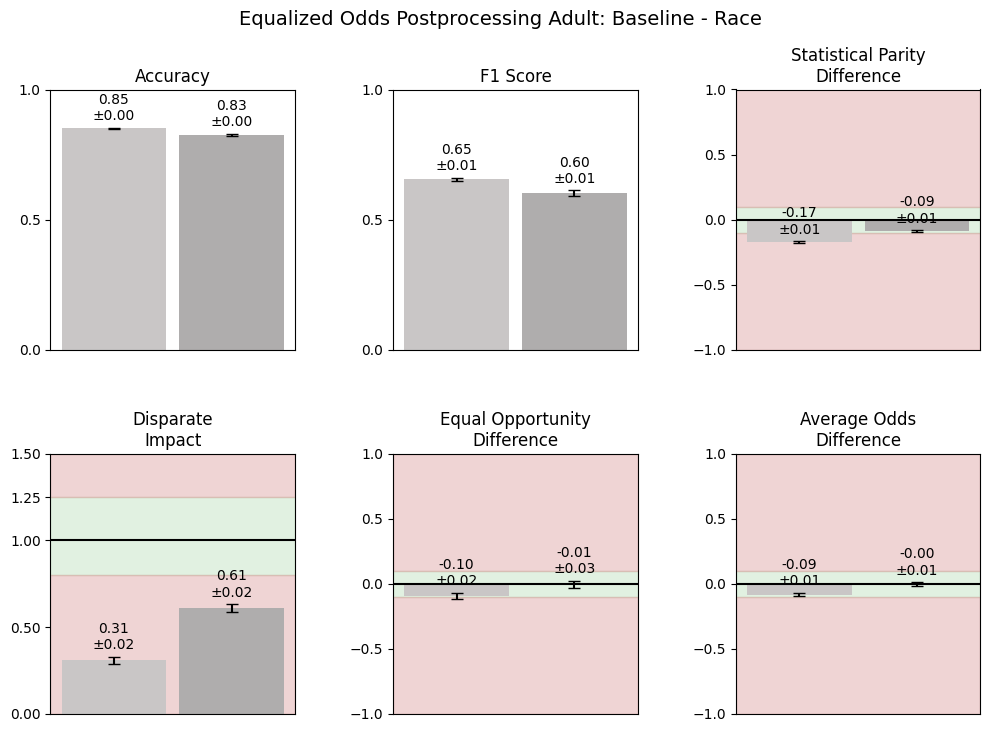

In [6]:
compare_viz_metrics_2x3(baseline_sex_agg, adult_sex_metrics_agg, 'Baseline', 'Race', 'Equalized Odds Postprocessing Adult: Baseline - Race')